In [ ]:
import warnings
import numpy as np
import pandas as pd
import seaborn as sbn
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages

In [18]:
warnings.filterwarnings('ignore')
np.set_printoptions(suppress=True, precision=3, linewidth=250)

In [3]:
def standardizer(x):
    
    """
        standardize entity-to-feature data matrix by 
          applying Z-scoring and Range standardization methods
        
        Arguments: 
            x, numpy array, entity-to-feature data matrix
        
        Returns:
            Z-scored and Range standardized data matrices
    """
    
    x_ave = np.mean(x, axis=0)
    x_rng = np.ptp(x, axis=0)
    x_std = np.std(x, axis=0)
    x_zscr_std = np.divide(np.subtract(x, x_ave), x_std)   # Z-scoring standardization
    x_rng_std = np.divide(np.subtract(x, x_ave), x_rng)  # Range standardization 
    return x_zscr_std, x_rng_std


### Loading Data set

In [4]:
x_org = np.loadtxt("../data/rin.dat")  #  data matrix

print("number of entities:", x_org.shape[0], ", number of features:", x_org.shape[1])

with open("../data/namrin", 'r') as fp:  # load names as list of string
    names_ = fp.readlines()

with open("../data/varrin", 'r') as fp:  # load features names as list of string
    features_ = fp.readlines()

number of entities: 91 , number of features: 5


### Creating Pandas DataFrame for Visualization


In [5]:
names = [name.strip() for name in names_]
features = [feature.strip().split(",")[0] for feature in features_]
# features

In [6]:
df = pd.DataFrame(data=x_org, columns=features[:-1], index=names[1:])
df.head()

,'Internet abonents,'Personal abon.,'Company abon.,'Mobile Int. user,'Volume of information
'Central',212.316,199.597,12.719,838.953,231.933
'Belgorod',248.517,236.956,11.558,963.444,361.539
'Bryansk',192.963,178.115,14.848,717.172,174.693
'Vladimir',155.780,145.530,10.250,649.882,202.636
'Voronezh',193.378,181.890,11.489,680.391,247.181


###### Find two features in your dataset with more or less “linear-like” scatter plot.
Let us use seaborn pairplot

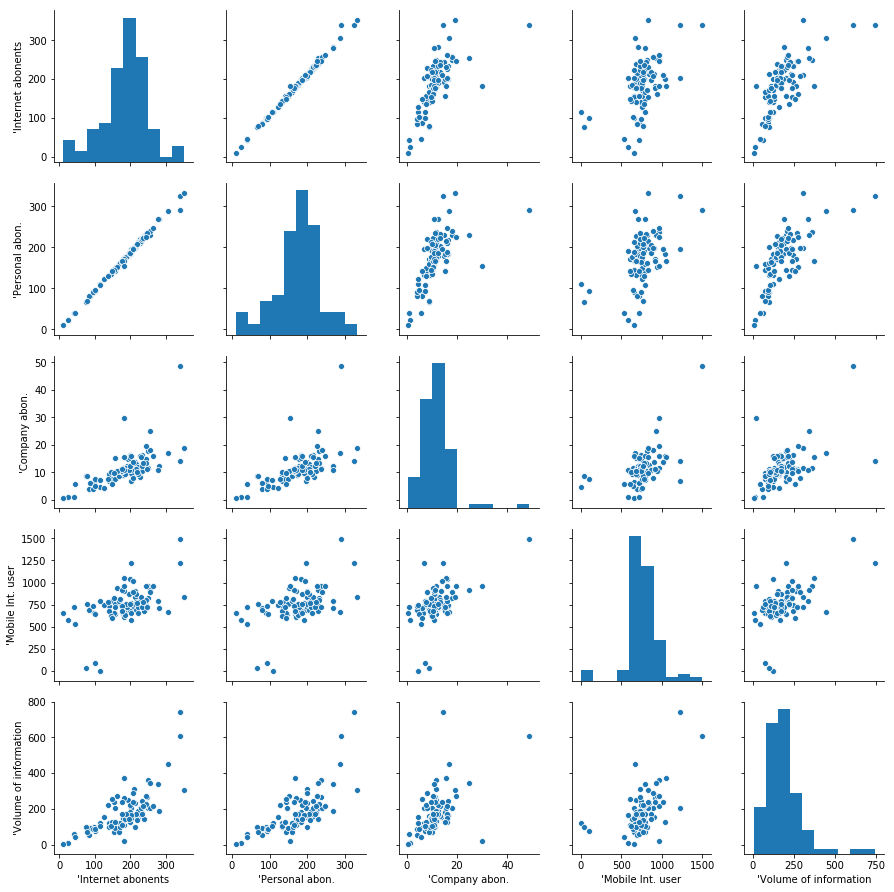

In [7]:
sbn.pairplot(data=df)
plt.show()

As one can see, the Internet abonents feature and the Personal abon. feature have quite linear relation.

So we will consider these two features for this HW.


- $ a = \frac{\sum_{i=1}^{N} (y_{i} - \bar{y}) . (x_{i} - \bar{x})/N}{\sum_{i=1}^{N}(x_{i} - \bar{x}) (x_{i} - \bar{x})/N} $ 

- $b = \bar{y} − a ·\bar{x}$

- $ \rho = \frac{\sum_{i=1}^{N} (y_{i} - \bar{y}) . (x_{i} - \bar{x})/N}{\sigma(x) \sigma(y)} $

- Moreover, $ a = \rho \frac{\sigma(y)}{\sigma(x)}$

Let us fit Linear Regression then:




In [8]:
# Standardizing Data
x_zscr_std, x_rng_std = standardizer(x=)  

In [95]:
x = x_zscr_std[:, 0]
y = x_zscr_std[:, 1]
N = x.shape[0]
a = (
    np.subtract(y, np.mean(y)) @ np.subtract(x, np.mean(x)) / N) / (
    (x - np.mean(x)) @ np.subtract(x, np.mean(x))/N)
b = np.mean(y) - a * np.mean(x)
print('y =', a, '* x ', b)

y = 0.9974133936943156 * x  5.829139312287458e-16


In [80]:
# # Alternative approach: using SKlearn Lib
# # Fitting Linear Regression 
# reg = LinearRegression().fit(x_zscr_std[:, 0].reshape(-1, 1), x_zscr_std[:, 1]) 
# print("coefficient:", reg.coef_, "intercept:", reg.intercept_)

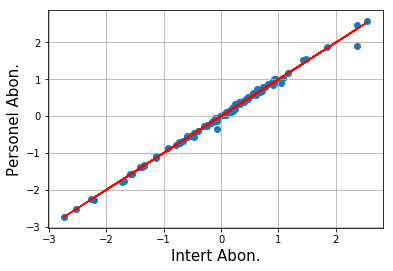

In [84]:
fig = plt.figure()
plt.scatter(x, y)
plt.plot(x, x*a + b, color='r')
# plt.plot(x, reg.predict(x.reshape(-1, 1)), color='g')
plt.grid()
plt.xlabel('Intert Abon.', size=15)
plt.ylabel('Personel Abon.', size=15)
plt.show()

In [91]:
# correlation coefficient
rho = (
    np.subtract(y, np.mean(y)) @ np.subtract(x, np.mean(x)) / N) /(
    np.var(x) * np.var(y))

# determinacy coefficient
rho_2 = 100*np.power(rho, 2)

print("correlation coefficient: %.3f " % rho,  
      "determinacy coefficient %.3f" % rho_2 + "%")

correlation coefficient: 0.997  determinacy coefficient 99.483%



- Correlation coefficient is a measure of degree of a linear relation between x and y. 
The closer it is to 1 or -1 the more linearly dependent are features.

As one can see, the relation is indeed strong

- Determinacy coefficient is the proportion of the variance $\sigma^{2}(y)$ taken into account by the linear regression of y over x.

As one can see, the proportion is equal to 99.5% (~ 0.5% is unexplained)

- Moreover, the slope of regression model is positive which shows the direct relation between two features


### Make prediction on some random points

In [99]:
np.random.seed(43)
indices =  np.random.choice(range(0, x.shape[0]), 3)


array([68, 64, 49])

In [105]:
y_hat = [a*x[idx]+b for idx in indices]
y_org = [y[idx] for idx in indices]
print("target values:   ", y_org, "\n"
      "predicted values:", y_hat)

target values:    [0.023695146432040754, 0.2558608217755136, 0.4175095801469988] 
predicted values: [0.024116432463688404, 0.22927971133473485, 0.38950305218701947]


the predicted values are indeed close target values.

Let us go and measure the mean-square erros between predicted values and target values

### Mean Relative Absolute Error

A measure of prediction accuracy of a forecasting method

$mrae = \frac{1}{N} \sum_{i=1}^{N} |\frac{y_{i} - y^{'}_{i}}{y_{i}}|$



Ref: https://en.wikipedia.org/wiki/Mean_absolute_percentage_error


In [129]:
mrae = 100*np.mean(np.absolute(y - a*x+b / np.absolute(y)))
print("mean relative absolute error : %.3f" % mrae + "%", "\n"
     "determinacy coefficient:       %.3f" % rho_2 + "%")

mean relative absolute error : 4.225% 
determinacy coefficient:       99.483%



- MRAE  explains explains prediction accuracy of the model. 

And in our case it shows 5% error, still acceptable in my opinion